In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score

In [32]:
def split_data(data):
    y_data=data.iloc[:,-1]
    X_data=data.iloc[:,:-1]
    X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,random_state=100,test_size=0.3)
    return X_train,X_test,y_train,y_test

In [33]:
def get_evaluation_index(y_true,y_predict):
    mae_score=mean_absolute_error(y_true,y_predict)
    rmse_score=math.sqrt(mean_squared_error(y_true,y_predict))
    r2_score_1=r2_score(y_true,y_predict)
    #print("mae_score:%s\nrmse_score:%s\nr2_score:%s"%(mae_score,rmse_score,r2_score_1))
    return mae_score,rmse_score,r2_score_1

In [34]:
#绘制学习曲线
def plot_learning_curve(algo,num,X_train,X_test,y_train,y_test):
    if len(X_train.shape)==1:
        X_train=[[x] for x in X_train]
        X_test=[[x] for x in X_test]
    train_score=[]
    test_score=[]
    for i in range(1,len(X_train)+1):
        if i%10==0:
            algo.fit(X_train[:i],y_train[:i])
            y_train_predict = algo.predict(X_train[:i])
            train_score.append(mean_absolute_error(y_train[:i],y_train_predict))

            y_test_predict=algo.predict(X_test)
            test_score.append(mean_absolute_error(y_test,y_test_predict))
    plt.xlabel("Train num")
    plt.ylabel("mae score")
    plt.title("feature number:%s"%num)
    plt.plot([i for i in range(1,len(train_score)+1)],np.sqrt(train_score),label="train")
    plt.plot([i for i in range(1,len(train_score)+1)],np.sqrt(test_score),label="test")
    plt.legend()
    #指定X轴和y轴的长度，X轴从0到len(X_train)+1,y轴从0到4
    plt.axis([0,len(train_score)+1,0,1])
    plt.show()

In [54]:
#读取数据
data_path='./data/zhengqi_train.txt'
o_data=pd.read_csv(data_path,sep='\t')
#读取测试数据
test_path='./data/zhengqi_test.txt'
test_data=pd.read_csv(test_path,sep='\t')

### 查看测试数据集和训练集的数据分布是否相同，去除掉不同分布的数据特征

d:\software\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


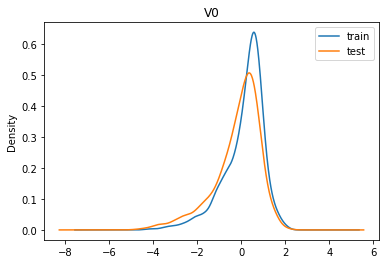

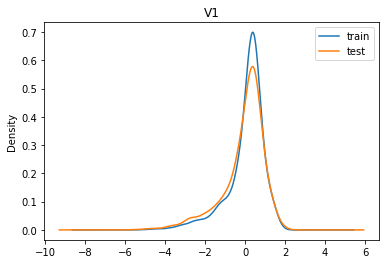

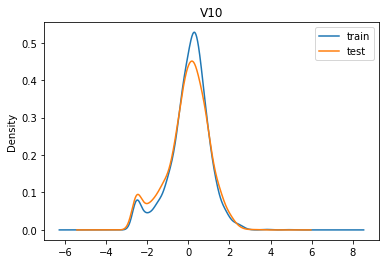

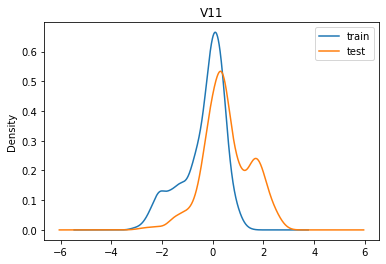

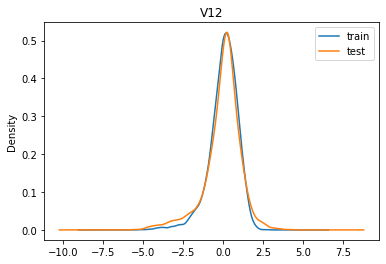

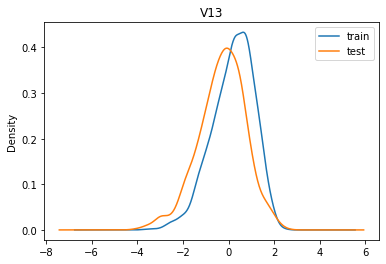

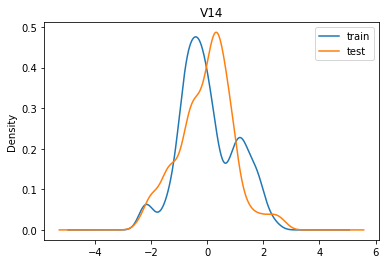

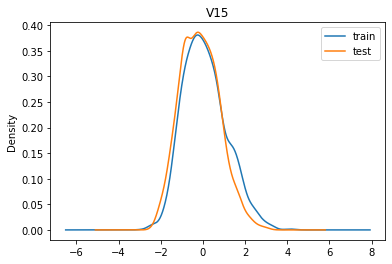

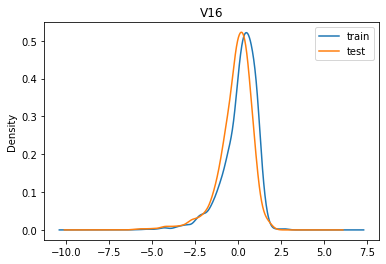

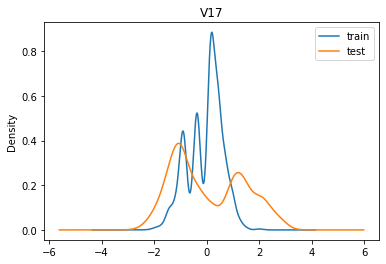

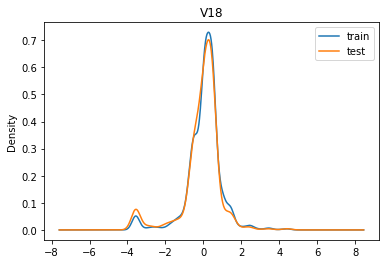

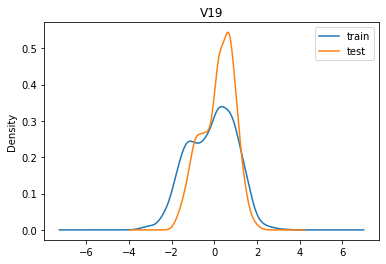

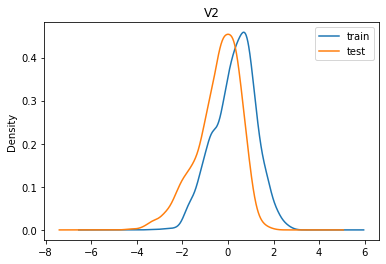

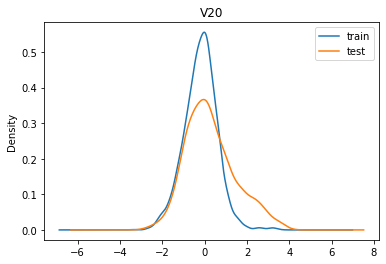

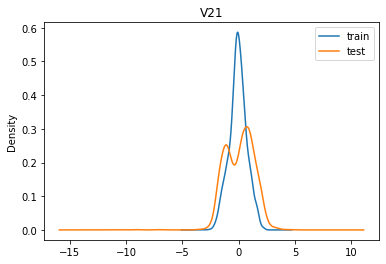

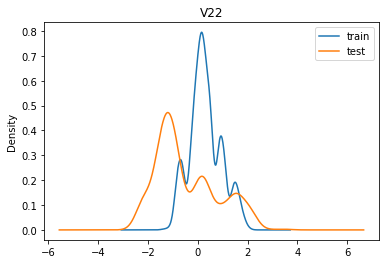

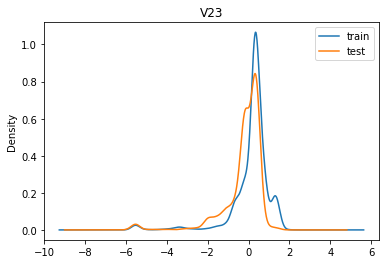

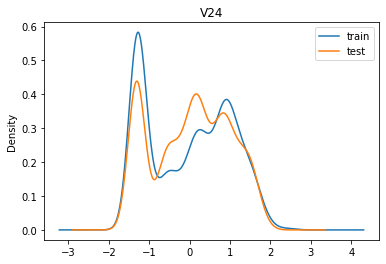

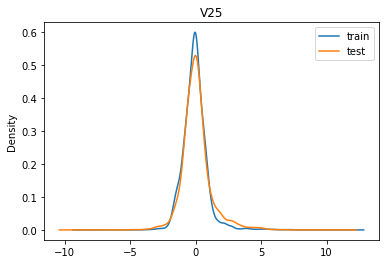

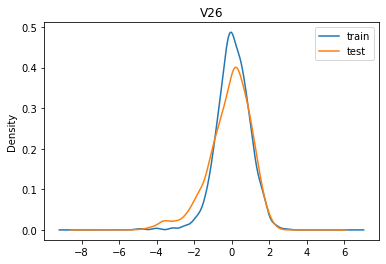

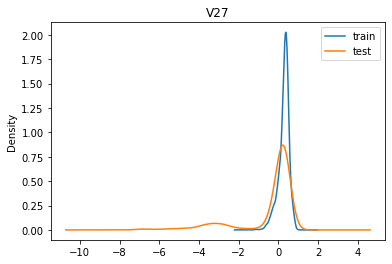

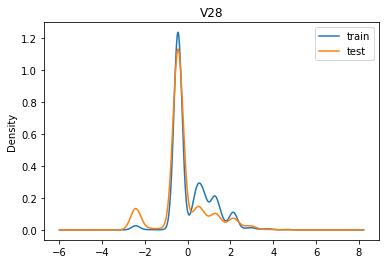

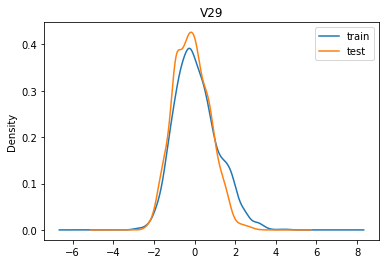

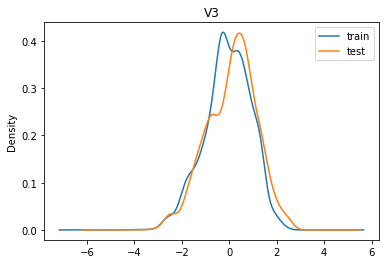

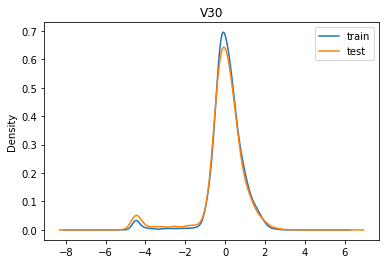

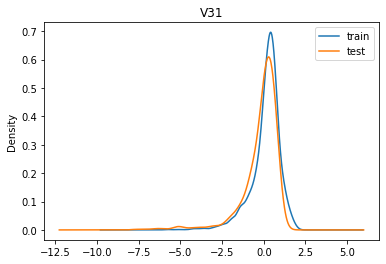

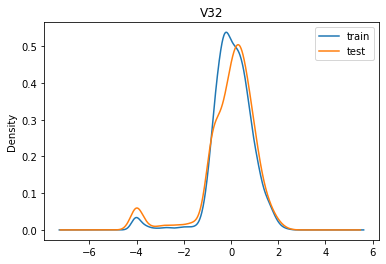

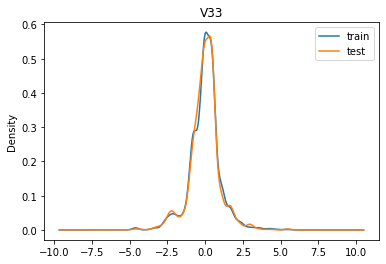

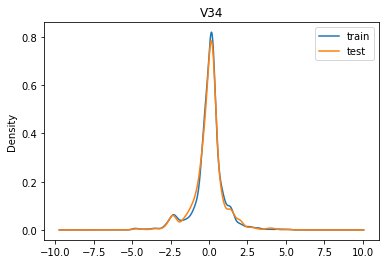

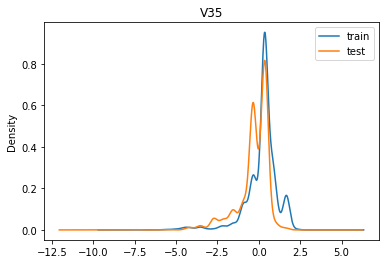

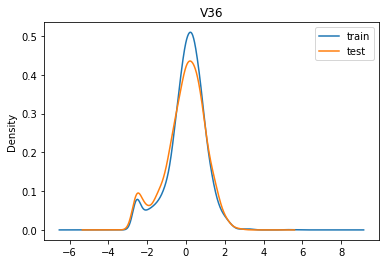

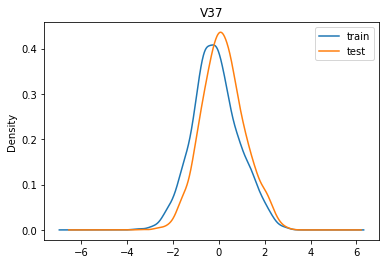

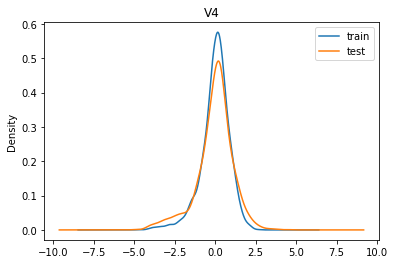

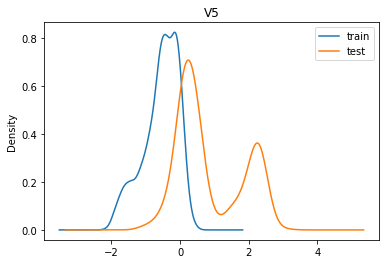

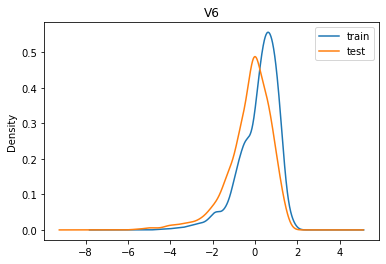

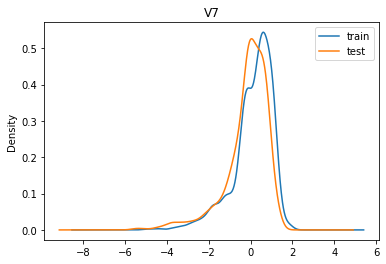

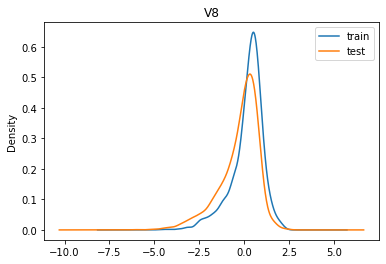

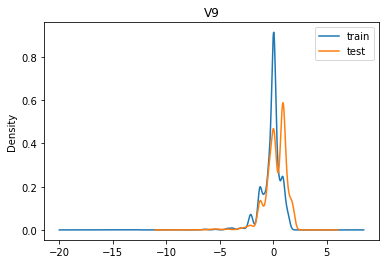

In [75]:
#合并训练集与测试集
o_data['type']='train'
test_data['type']='test'
all_data=pd.concat([o_data,test_data])
#绘制训练集与测试集的分布图
for feature in all_data.columns[:-2]:
    all_data[all_data['type']=='train'][feature].plot(kind='kde')
    all_data[all_data['type']=='test'][feature].plot(kind='kde')
    plt.title(feature)
    plt.legend(['train','test'])
    plt.show()


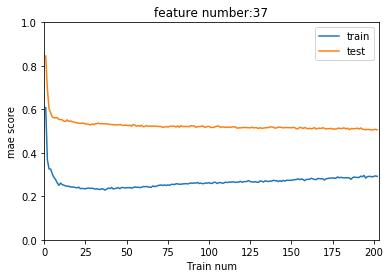

drop feature:['V11']
 mae:0.25704015497930327	 rmse:0.3639954930932604	 r2:0.8559319438690554



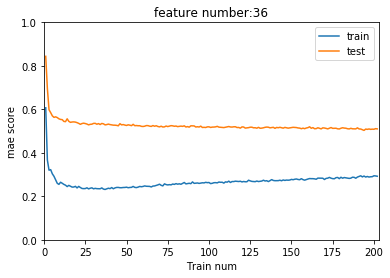

drop feature:['V11', 'V13']
 mae:0.25463421230662653	 rmse:0.36095805032531497	 r2:0.8583263287650281



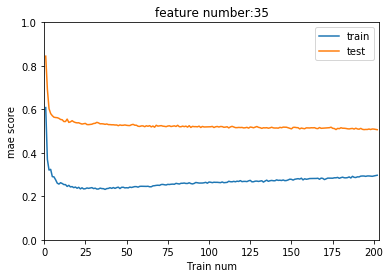

drop feature:['V11', 'V13', 'V14']
 mae:0.2582894501672347	 rmse:0.3684622665288181	 r2:0.8523743842030826



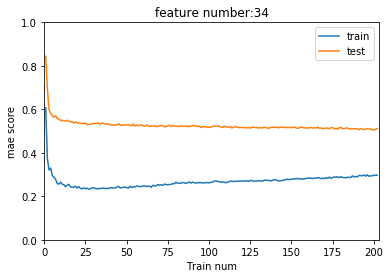

drop feature:['V11', 'V13', 'V14', 'V17']
 mae:0.25742552947310565	 rmse:0.36239572519405006	 r2:0.8571955253343144



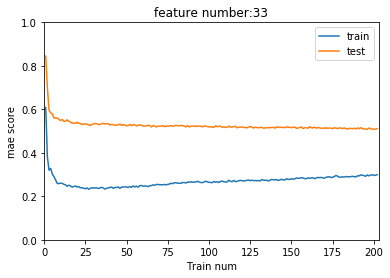

drop feature:['V11', 'V13', 'V14', 'V17', 'V19']
 mae:0.25472590503753123	 rmse:0.3630166879963099	 r2:0.856705716908293



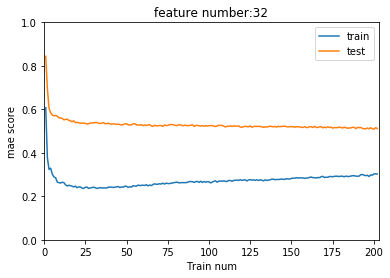

drop feature:['V11', 'V13', 'V14', 'V17', 'V19', 'V2']
 mae:0.2628067618631849	 rmse:0.37101119741468347	 r2:0.8503248444923472



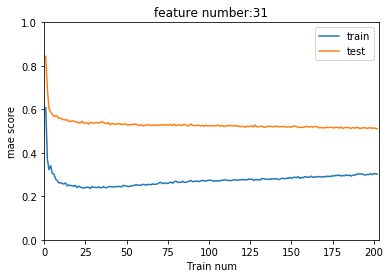

drop feature:['V11', 'V13', 'V14', 'V17', 'V19', 'V2', 'V21']
 mae:0.2624401040178957	 rmse:0.36874708338552065	 r2:0.8521460703793527



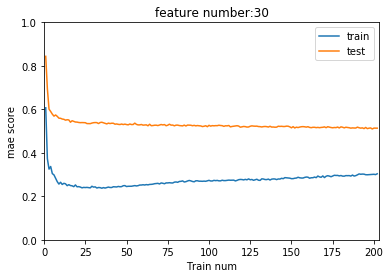

drop feature:['V11', 'V13', 'V14', 'V17', 'V19', 'V2', 'V21', 'V35']
 mae:0.26572150799394895	 rmse:0.36943004994682216	 r2:0.8515978745687574



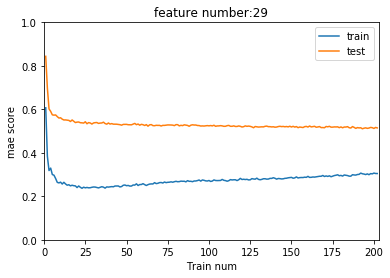

drop feature:['V11', 'V13', 'V14', 'V17', 'V19', 'V2', 'V21', 'V35', 'V22']
 mae:0.26702602475874704	 rmse:0.37041768863892266	 r2:0.8508033339027861



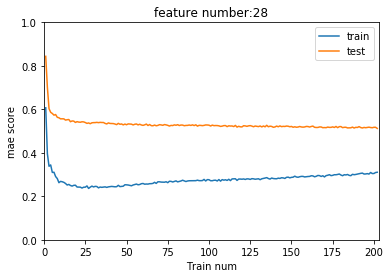

drop feature:['V11', 'V13', 'V14', 'V17', 'V19', 'V2', 'V21', 'V35', 'V22', 'V27']
 mae:0.26475189086090184	 rmse:0.37051816098146284	 r2:0.8507223865184175



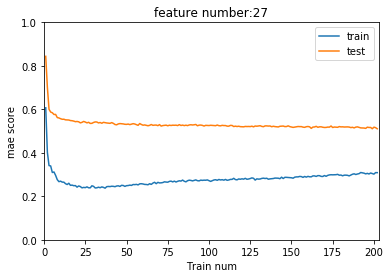

drop feature:['V11', 'V13', 'V14', 'V17', 'V19', 'V2', 'V21', 'V35', 'V22', 'V27', 'V5']
 mae:0.26590159576299416	 rmse:0.37372879584182506	 r2:0.8481241201729346



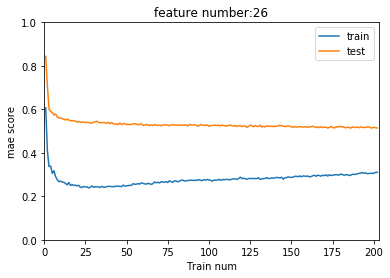

drop feature:['V11', 'V13', 'V14', 'V17', 'V19', 'V2', 'V21', 'V35', 'V22', 'V27', 'V5', 'V9']
 mae:0.26421063964727154	 rmse:0.37162021692376973	 r2:0.84983305391312



In [120]:
#删除掉分布不一样的特征数据 
#通过观察上述分布图发现v11,v13,v14,v17,v19,v2,v21,v35,v22,v27,v5,v9
#删除掉分布不一样的特征，然后对比模型的准确度
#自己挑的：'V11','V13','V14','V17','V19','V2','V21','V35','V22','V27','V5','V9' 提交结果：0.1350
#论坛中的："V5","V9","V11","V17","V22","V28" 提交结果：0.1361
drop_feature_list=['V11','V13','V14','V17','V19','V2','V21','V35','V22','V27','V5','V9']
add_drop_feature=[]
for drop_feature in drop_feature_list:
    add_drop_feature.append(drop_feature)
    all_data_drop=all_data.drop(labels=add_drop_feature,axis=1)
    train_data_drop=all_data_drop[all_data_drop['type']=='train'].drop(labels=['type'],axis=1)
    X_train,X_test,y_train,y_test=split_data(train_data_drop)
    xgb_reg=XGBRegressor(max_depth=8,min_child_weight=5,eta=0.05, gamma=0.025,colsample_bytree= 0.6,subsample=0.7)
    xgb_reg.fit(X_train,y_train)
    y_predict=xgb_reg.predict(X_test)
    mae_score,rmse_score,r2_score_1=get_evaluation_index(y_test,y_predict)
    plot_learning_curve(xgb_reg,len(X_train.columns),X_train,X_test,y_train,y_test)
    print("drop feature:%s\n mae:%s\t rmse:%s\t r2:%s\n"%([feature for feature in add_drop_feature],mae_score,rmse_score,r2_score_1))

In [122]:
#保存drop_feature之后的结果
all_data_drop.to_csv('./re/all_data_drop.txt',header=True,index=False)

In [2]:
all_data_drop_1=pd.read_csv('./re/all_data_drop.txt')

In [119]:
test_data_drop=all_data_drop[all_data_drop['type']=='test'].drop(['type','target'],axis=1)
y_predict=xgb_reg.predict(test_data_drop)
y_predict_df=pd.DataFrame(y_predict)
y_predict_df.to_csv('./re/y_predict_1.txt',header=False,index=False)

### 通过皮尔逊相关系数 去掉相关性弱的特征

In [106]:
train_data=all_data_drop_1[all_data_drop_1['type']=='train'].drop(['type'],axis=1)

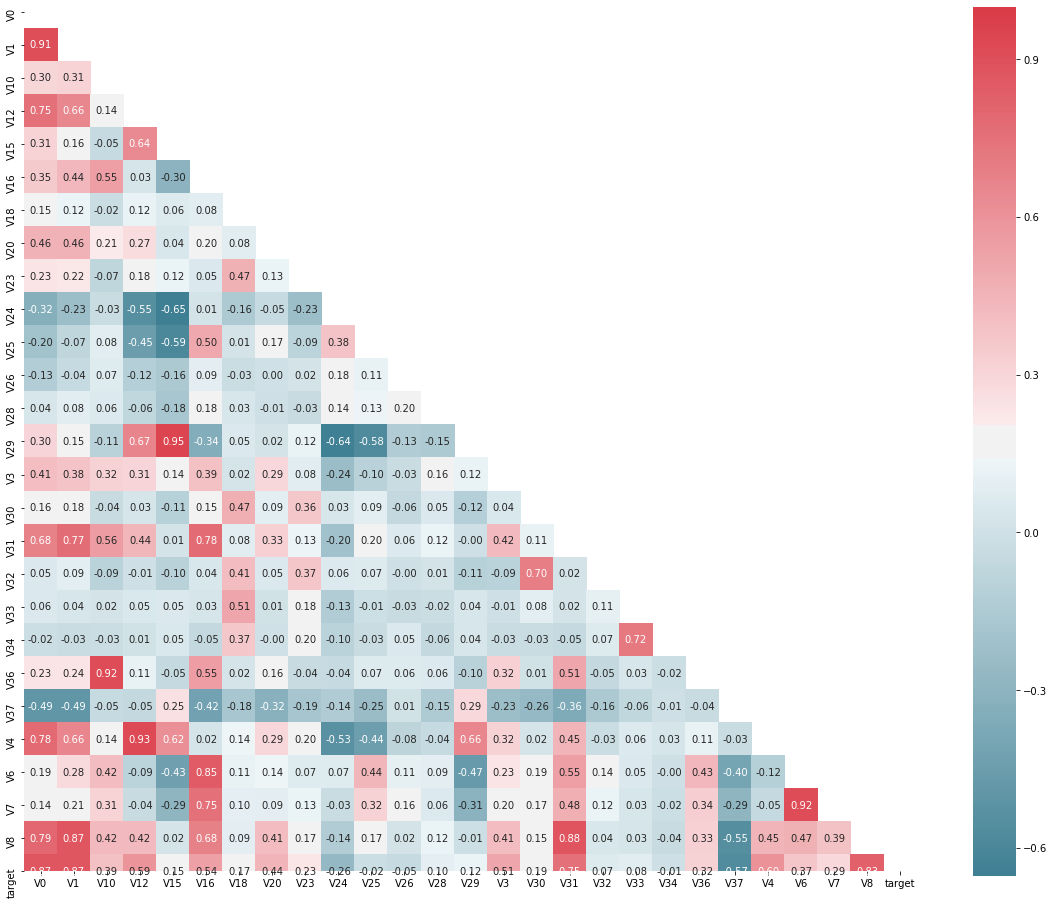

In [107]:
# 找出相关程度
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = train_data.columns.tolist()  # 列表头
pearson_corr = train_data[colnm].corr(method="pearson")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(pearson_corr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(pearson_corr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

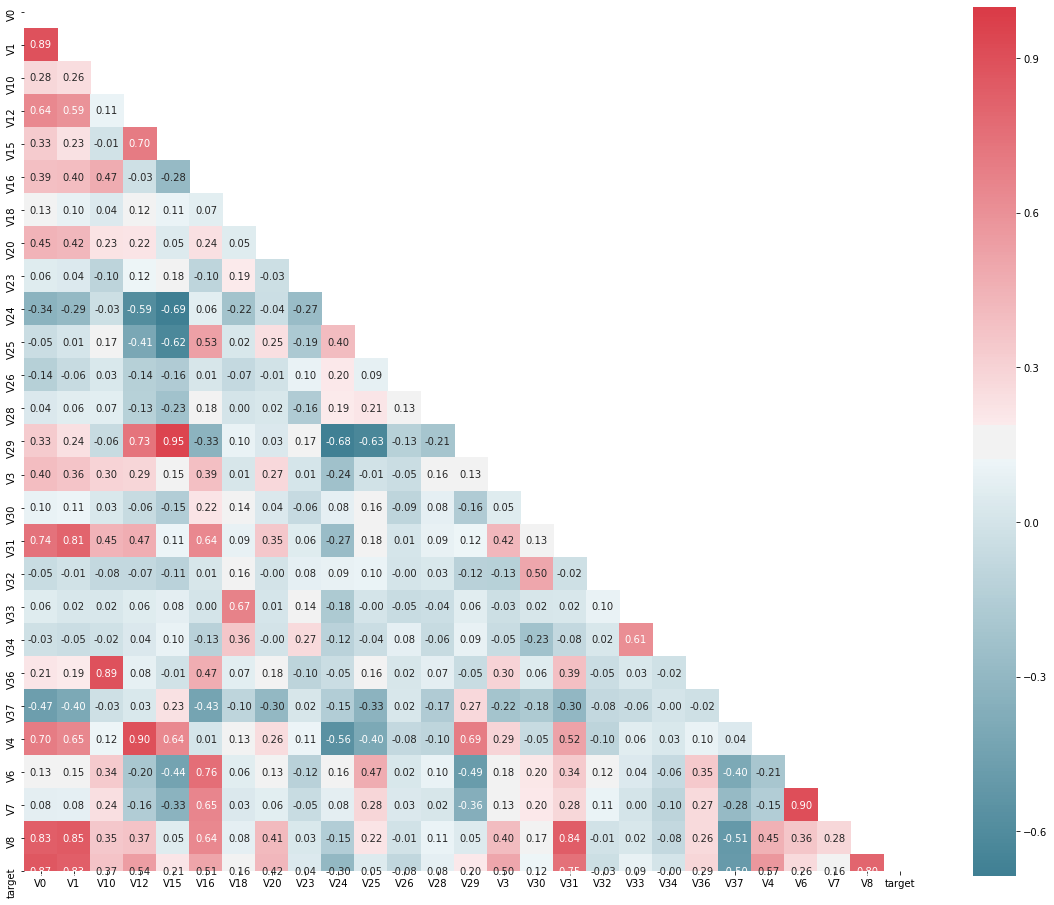

In [108]:
# 找出相关程度
plt.figure(figsize=(20, 16))  # 指定绘图对象宽度和高度
colnm = train_data.columns.tolist()  # 列表头
spearman_corr = train_data[colnm].corr(method="spearman")  # 相关系数矩阵，即给出了任意两个变量之间的相关系数
mask = np.zeros_like(spearman_corr, dtype=np.bool)  # 构造与mcorr同维数矩阵 为bool型
mask[np.triu_indices_from(mask)] = True  # 角分线右侧为True
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # 返回matplotlib colormap对象
g = sns.heatmap(spearman_corr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  # 热力图（看两两相似度）
plt.show()

In [109]:
s1=spearman_corr['target']
s2=pearson_corr['target']
com_between_corr=pd.merge(left=s1,right=s2,on=s1.index).set_index('key_0').rename(columns={'target_x':'spearman_corr','target_y':'pearson_corr'})
com_between_corr

,spearman_corr,pearson_corr
key_0,,
V0,0.866709,0.873212
V1,0.832457,0.871846
V10,0.371067,0.394767
V12,0.542429,0.594189
V15,0.213490,0.154020
V16,0.510025,0.536748
V18,0.162710,0.170721
V20,0.420424,0.444965
V23,0.043597,0.226331


In [110]:
### 分别根据pearson 和spearman 相关系数去除无用特征
#首先设置阈值为0.1，去除相关性小于0.1的特征
thresholding=0.1
drop_feature_by_spearman=com_between_corr[np.abs(com_between_corr['spearman_corr'])<=thresholding].index
drop_feature_by_pearson=com_between_corr[np.abs(com_between_corr['pearson_corr'])<=thresholding].index
print("spearman:%s"%drop_feature_by_pearson)
print("pearson:%s"%drop_feature_by_spearman)

spearman:Index(['V25', 'V26', 'V32', 'V33', 'V34'], dtype='object', name='key_0')
pearson:Index(['V23', 'V25', 'V26', 'V28', 'V32', 'V33', 'V34'], dtype='object', name='key_0')


In [78]:
def get_drop_feature_by_corr(data,thresholding=0.1,corr_name='spearman'):
    train_data=data[data['type']=='train'].drop(['type'],axis=1)
    corr = train_data[colnm].corr(method=corr_name)  
    s1=corr['target']
    drop_feature=s1[np.abs(s1)<=thresholding].index
    return drop_feature

In [94]:
def get_train_data_drop_corr(data):
    all_data_drop_feature_by_corr=data.drop(labels=drop_feature,axis=1)
    train_data_drop=all_data_drop_feature_by_corr[all_data_drop_feature_by_corr['type']=='train'].drop(labels=['type'],axis=1)
    test_data_drop=all_data_drop_feature_by_corr[all_data_drop_feature_by_corr['type']=='test'].drop(labels=['type','target'],axis=1)
    return train_data_drop,test_data_drop

In [90]:
def result_to_save(re,path):
    y_predict_df=pd.DataFrame(y_predict)
    y_predict_df.to_csv(path,header=False,index=False)

In [115]:
para_dict=[]
for corr_name in ['spearman','pearson']:
    for thresholding in [0.1,0.15,0.2,0.3,0.4,0.6]:
        #设定相关性及阈值获取需要删除的特征
        drop_feature=get_drop_feature_by_corr(all_data_drop_1,thresholding,corr_name)
        train_data_drop,test_data_drop=get_train_data_drop_corr(all_data_drop_1)
        xgb_reg=XGBRegressor(n_estimators=1000,max_depth=8,min_child_weight=5,eta=0.05, gamma=0.025,colsample_bytree= 0.6,subsample=0.7)
        data=train_data_drop
        y_data=data.iloc[:,-1]
        X_data=data.iloc[:,:-1]
        scores=cross_val_score(xgb_reg,X_data,y_data,scoring='neg_mean_absolute_error',cv=10)
        para_dict.append((corr_name,thresholding,scores))
        print("corr_name:%s\tthresholding:%f\tMAE:%s"%(corr_name,thresholding,np.mean(-scores)))

corr_name:spearman	thresholding:0.100000	MAE:0.2746621261260009
corr_name:spearman	thresholding:0.150000	MAE:0.2756855443600868
corr_name:spearman	thresholding:0.200000	MAE:0.2753941952672937
corr_name:spearman	thresholding:0.300000	MAE:0.2861521362293705
corr_name:spearman	thresholding:0.400000	MAE:0.2947077582560843
corr_name:spearman	thresholding:0.600000	MAE:0.35296037571265554
corr_name:pearson	thresholding:0.100000	MAE:0.27521229267314895
corr_name:pearson	thresholding:0.150000	MAE:0.27514355235852983
corr_name:pearson	thresholding:0.200000	MAE:0.27437968069383306
corr_name:pearson	thresholding:0.300000	MAE:0.27978719397447194
corr_name:pearson	thresholding:0.400000	MAE:0.2947077582560843
corr_name:pearson	thresholding:0.600000	MAE:0.3398400815693006


In [96]:
drop_feature=get_drop_feature_by_corr(all_data_drop_1,0.2,'spearman')
train_data_drop,X_test=get_train_data_drop_corr(all_data_drop_1)
xgb_reg=XGBRegressor(max_depth=8,min_child_weight=5,eta=0.05, gamma=0.025,colsample_bytree= 0.6,subsample=0.7)
y_data=train_data_drop.iloc[:,-1]
X_data=train_data_drop.iloc[:,:-1]
xgb_reg.fit(X_data,y_data)
y_predict=xgb_reg.predict(X_test)
result_to_save(y_predict,'./re/y_predict_1.txt')